###IRI - Tsyganenko (Geopack and T96)

In [9]:
%matplotlib inline
import numpy as np
import tsyganenko

/home/rollo/code/tsyganenko/tsyganenko/__init__.py:81: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if not None in [lat, lon, rho]:



vswgse=[  -400,     0,     0]    [m/s]
pdyn=  2                        [nPa]
dst= -5                         [nT]
byimf=  0                       [nT]
bzimf= -5                       [nT]
                    
Coords: geo
(latitude [degrees], longitude [degrees], distance from center of the Earth [km])

(10.000,  0.000, 6372.000) @ 23:11 UT (13-Jul-16)
    --> NH(   nan,    nan,    nan)
    --> SH( 9.987,  0.001, 6371.194)
                        
(20.000,  0.000, 6372.000) @ 23:11 UT (13-Jul-16)
    --> NH(   nan,    nan,    nan)
    --> SH(19.990,  0.001, 6371.196)
                        
(30.000,  0.000, 6372.000) @ 23:11 UT (13-Jul-16)
    --> NH(   nan,    nan,    nan)
    --> SH(29.993,  0.001, 6371.197)
                        
(40.000,  0.000, 6372.000) @ 23:11 UT (13-Jul-16)
    --> NH(   nan,    nan,    nan)
    --> SH(39.994,  0.001, 6371.198)
                        
(50.000,  0.000, 6372.000) @ 23:11 UT (13-Jul-16)
    --> NH(   nan,    nan,    nan)
    --> SH(49.995,  0.

/home/rollo/code/tsyganenko/tsyganenko/__init__.py:430: RuntimeWarning: invalid value encountered in less
  indMask = sign*self.yTrace[ip,0:self.l[ip]] < 0


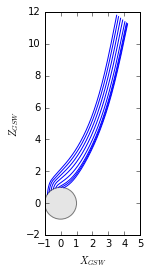

In [10]:
lats = range(10, 90, 10)
lons = np.zeros(len(lats))
rhos = 6372.*np.ones(len(lats))
trace = tsyganenko.tsygTrace(lats, lons, rhos)
print(trace)
ax = trace.plot()

- **The "Plumbing" way**

In [11]:
# Inputs
# Date and time
year = 2000
doy = 1
hr = 12
mn = 0
sc = 0
# Solar wind speed
vxgse = -400.
vygse = 0.
vzgse = 0.
# Execution parameters
lmax = 5000
rlim = 60. 
r0 = 1. 
dsmax = .01
err = .000001
# Direction of the tracing
mapto = 1
# Magnetic activity [SW pressure (nPa), Dst, ByIMF, BzIMF]
parmod = np.zeros(10)
parmod[0:4] = [2, -8, -2, -5]
# Start point (rh in Re)
lat = 50.
lon = 0.
rh = 0.

# This has to be called first
tsyganenko.tsygFort.recalc_08(year,doy,hr,mn,sc,vxgse,vygse,vzgse)

# Convert lat,lon to geographic cartesian and then gsw
r,theta,phi, xgeo, ygeo, zgeo = tsyganenko.tsygFort.sphcar_08(1., np.radians(90.-lat), np.radians(lon), 0., 0., 0., 1)
xgeo,ygeo,zgeo,xgsw,ygsw,zgsw  = tsyganenko.tsygFort.geogsw_08(xgeo, ygeo, zgeo,0,0,0,1)

# Trace field line
xfgsw,yfgsw,zfgsw,xarr,yarr,zarr,l = tsyganenko.tsygFort.trace_08(xgsw,ygsw,zgsw,mapto,dsmax,err, 
    rlim,r0,0,parmod,'T96_01','IGRF_GSW_08',lmax) 

# Convert back to spherical geographic coords
xfgeo,yfgeo,zfgeo,xfgsw,yfgsw,zfgsw  = tsyganenko.tsygFort.geogsw_08(0,0,0,xfgsw,yfgsw,zfgsw,-1)
gcR, gdcolat, gdlon, xgeo, ygeo, zgeo = tsyganenko.tsygFort.sphcar_08(0., 0., 0., xfgeo, yfgeo, zfgeo, -1)


print('** START: {:6.3f}, {:6.3f}, {:6.3f}'.format(lat, lon, 1.))
print('** STOP:  {:6.3f}, {:6.3f}, {:6.3f}'.format(90.-np.degrees(gdcolat), np.degrees(gdlon), gcR))

** START: 50.000,  0.000,  1.000
** STOP:  50.000,  0.000,  1.000


(-4, 4)

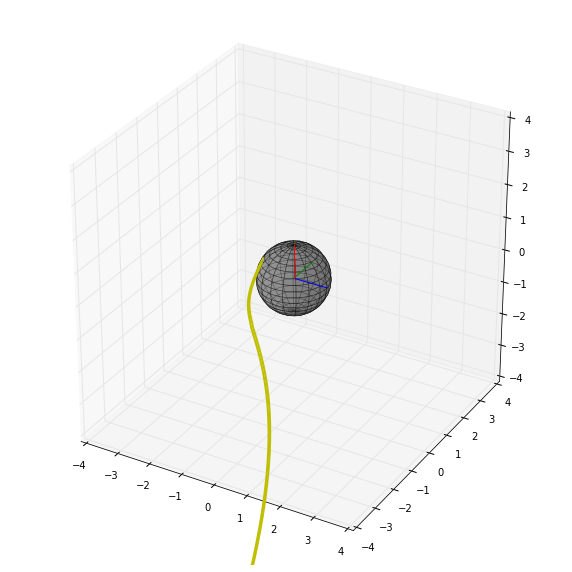

In [13]:
# A quick checking plot
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import proj3d
import numpy as np
fig = figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
# Plot coordinate system
ax.plot3D([0,1],[0,0],[0,0],'b')
ax.plot3D([0,0],[0,1],[0,0],'g')
ax.plot3D([0,0],[0,0],[0,1],'r')

# First plot a nice sphere for the Earth
u = np.linspace(0, 2 * np.pi, 179)
v = np.linspace(0, np.pi, 179)
tx = np.outer(np.cos(u), np.sin(v))
ty = np.outer(np.sin(u), np.sin(v))
tz = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(tx,ty,tz,rstride=10, cstride=10, color='grey', alpha=.5, zorder=2, linewidth=0.5)

# Then plot the traced field line
latarr = [10.,20.,30.,40.,50.,60.,70.,80.]
lonarr = [0., 180.]
rh = 0.
for lon in lonarr:
    for lat in latarr:
        r,theta,phi, xgeo, ygeo, zgeo = tsyganenko.tsygFort.sphcar_08(1., np.radians(90.-lat), np.radians(lon), 0., 0., 0., 1)
        xgeo,ygeo,zgeo,xgsw,ygsw,zgsw  = tsyganenko.tsygFort.geogsw_08(xgeo, ygeo, zgeo,0,0,0,1)
        xfgsw,yfgsw,zfgsw,xarr,yarr,zarr,l = tsyganenko.tsygFort.trace_08(xgsw,ygsw,zgsw,mapto,dsmax,err, 
            rlim,r0,0,parmod,'T96_01','IGRF_GSW_08',lmax) 
        for i in range(l):
            xgeo,ygeo,zgeo,dum,dum,dum  = tsyganenko.tsygFort.geogsw_08(0,0,0,xarr[i],yarr[i],zarr[i],-1)
            xarr[i],yarr[i],zarr[i] = xgeo,ygeo,zgeo
        ax.plot3D(xarr[0:l],yarr[0:l],zarr[0:l], zorder=3, linewidth=2, color='y')

# Set plot limits
lim=4
ax.set_xlim3d([-lim,lim])
ax.set_ylim3d([-lim,lim])
ax.set_zlim3d([-lim,lim])